## Data Science 100 Group Project: Classification of 

In [2]:
## load packages
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
## read data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
## Filter data and select data so there's no N/A observations in the predictor variables
heart_disease_data <- filter(heart_disease_data, age != "?", chol != "?", trestbps != "?",  thalach != "?", num != "?") |>
    select(age, chol, trestbps, thalach, num) |>
    mutate(presence = case_when(num == 0 ~ "absence",
                                num == 1 ~ "small presence",
                                num == 2 ~ "presence",
                                num == 3 ~ "strong presence",
                                num == 4 ~ "strongest presence")) |>
    mutate(presence = as.factor(presence))

## specify levels of factor column
disease_factored <- factor(c("absence", "small presence", "presence", "strong presence", "strongest presence"))
levels(heart_disease_data$presence) <- disease_factored

heart_disease_data

age,chol,trestbps,thalach,num,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,0,absence
67,286,160,108,2,small presence
67,229,120,129,1,presence
37,250,130,187,0,absence
41,204,130,172,0,absence
56,236,120,178,0,absence
62,268,140,160,3,strong presence
57,354,120,163,0,absence
63,254,130,147,2,small presence


[1] "#FFFF00" "#FFBF00" "#FF7F00" "#FF3F00" "#FF0000"

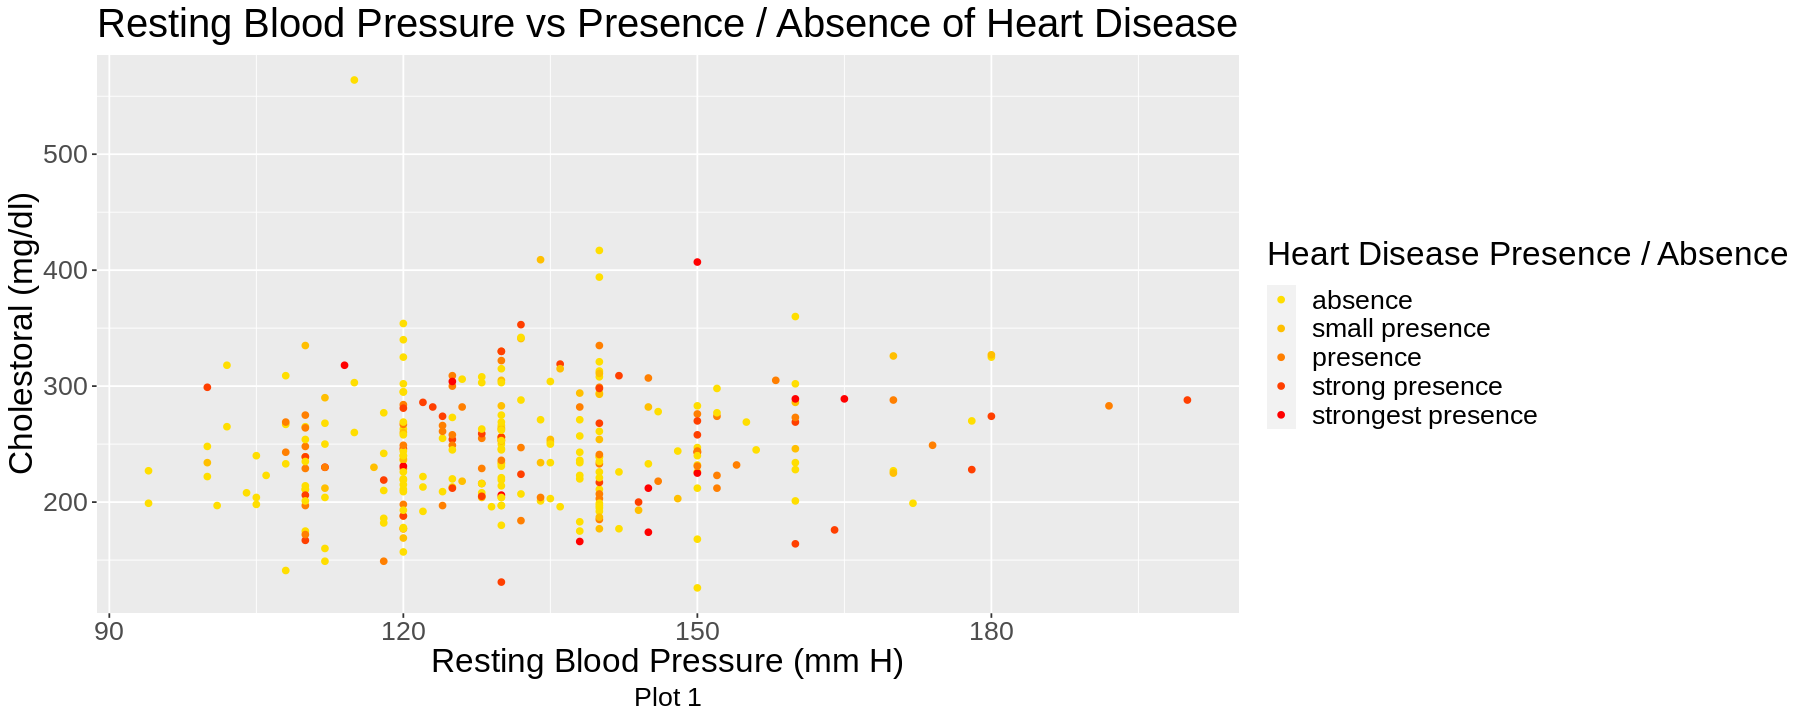

In [38]:
## plot
options(repr.plot.width=15, repr.plot.height=6)

## set colours
colfunc <- colorRampPalette(c("yellow", "red"))
colfunc(5)

categories <- c("absence", "small presence", "presence", "strong presence", "strongest presence")

colours <- c("absence" = '#FFDE00', "small presence" = '#FFBF00', "presence" = '#FF7F00', "strong presence" = '#FF3F00', "strongest presence" = '#FF0000')

heart_disease_data |>  
    ggplot(aes(x=trestbps, 
               y= chol, 
               colour = presence)) +
    scale_color_manual(values = colours) +
        labs(x = "Resting Blood Pressure (mm H)",
             y = "Cholestoral (mg/dl)",
             title = "Resting Blood Pressure vs Presence / Absence of Heart Disease", 
            colour = 'Heart Disease Presence / Absence',
            caption = "Plot 1") +
        geom_point() +
        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


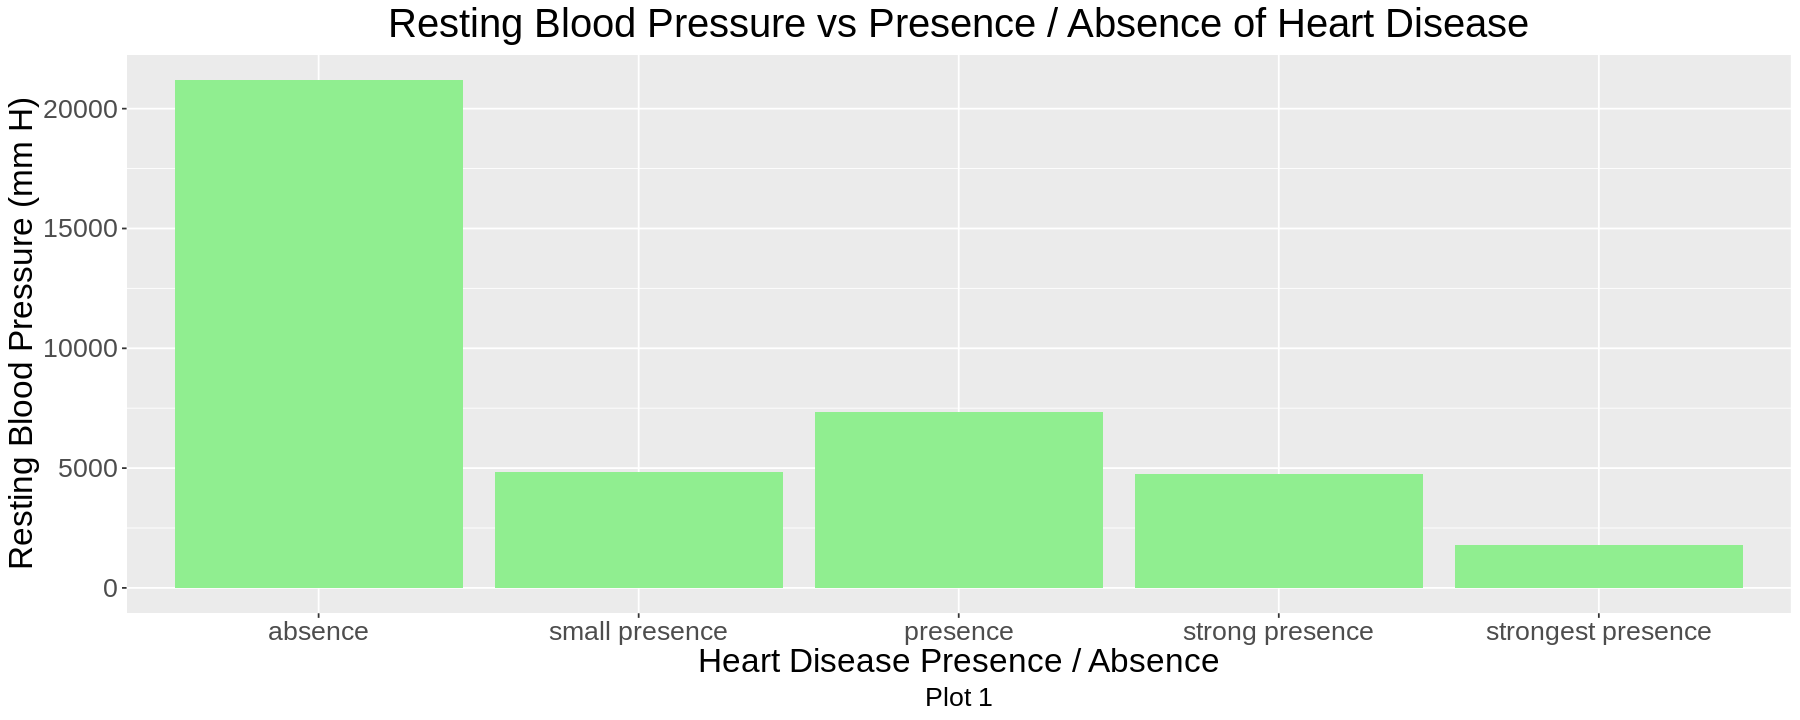

In [39]:
## plot
options(repr.plot.width=15, repr.plot.height=6)

heart_disease_data |>  
    ggplot(aes(x=presence, 
               y=trestbps)) +
        labs(x = "Heart Disease Presence / Absence",
             y = "Resting Blood Pressure (mm H)",
             title = "Resting Blood Pressure vs Presence / Absence of Heart Disease", 
            caption = "Plot 1") +
        geom_bar(stat = "identity", fill = "#90ee90") +
        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


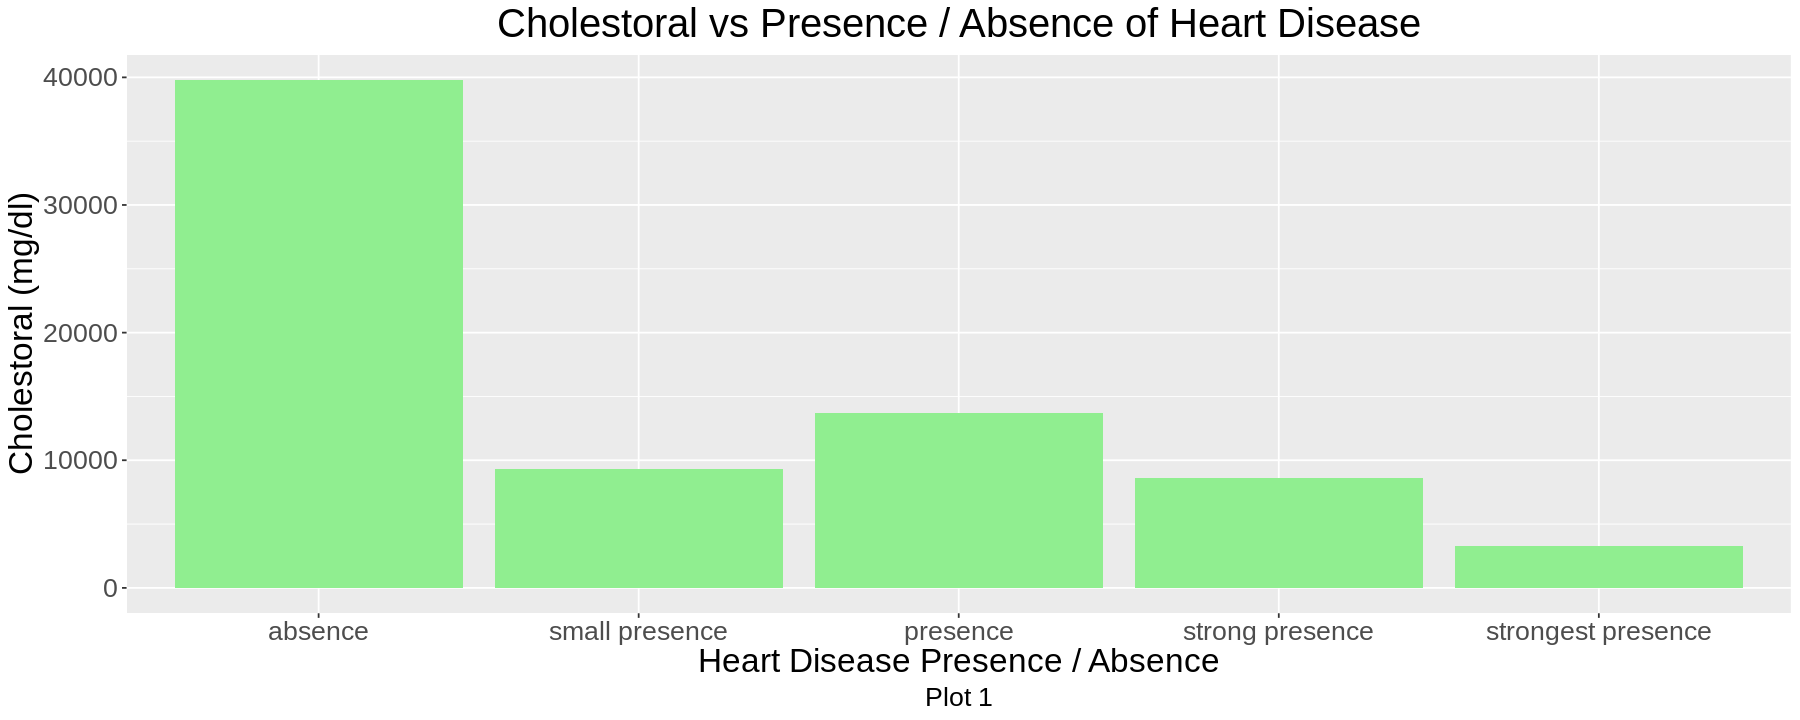

In [40]:
## plot
options(repr.plot.width=15, repr.plot.height=6)

heart_disease_data |>  
    ggplot(aes(x=presence, 
               y=chol)) +
        labs(x = "Heart Disease Presence / Absence",
             y = "Cholestoral (mg/dl)",
             title = "Cholestoral vs Presence / Absence of Heart Disease", 
            caption = "Plot 1") +
        geom_bar(stat = "identity", fill = "#90ee90") +
        theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


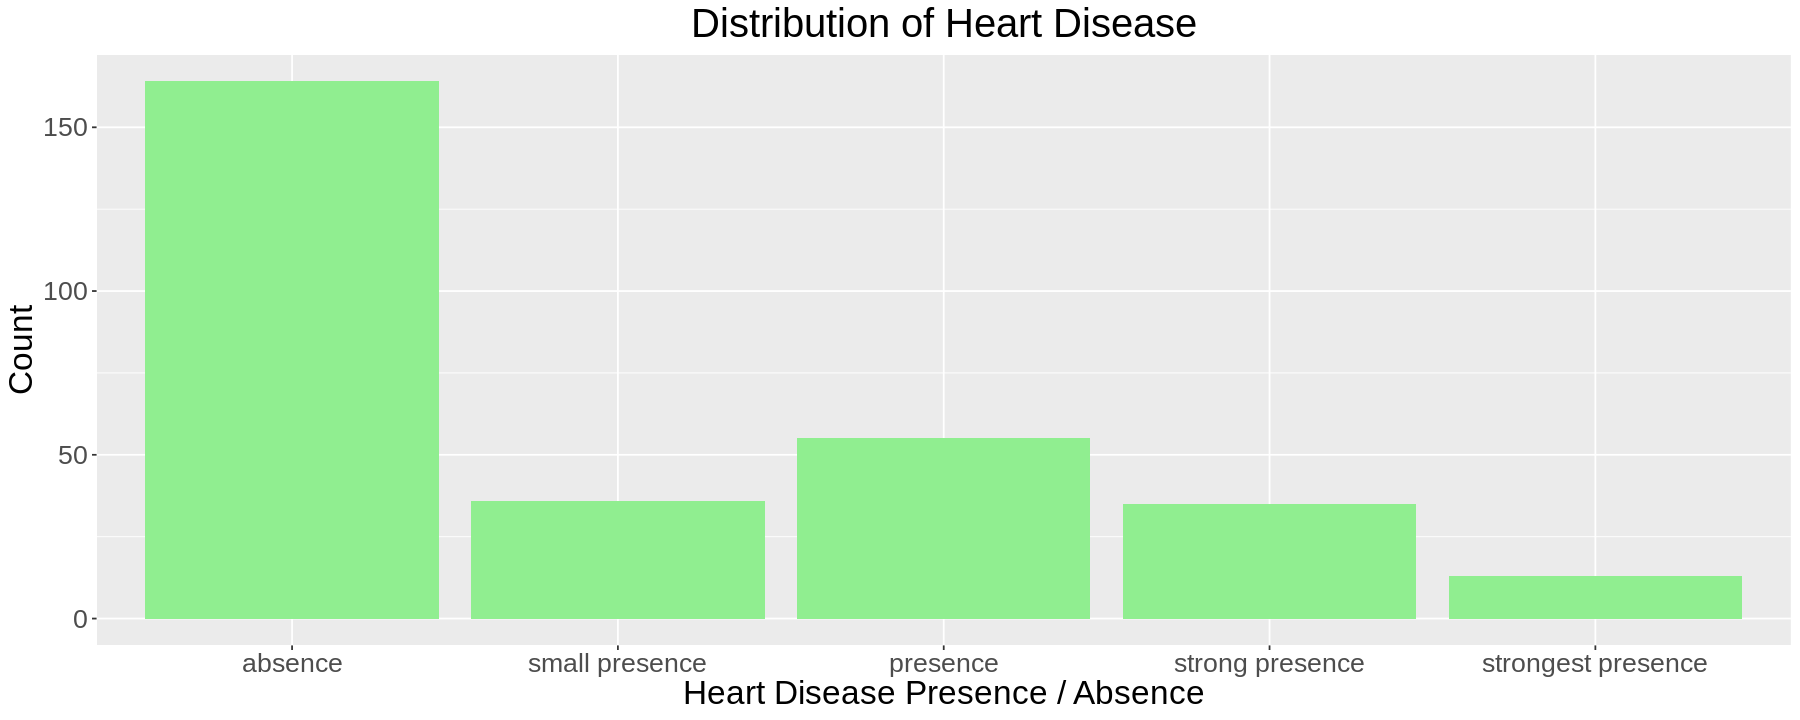

In [42]:
## plot
options(repr.plot.width=15, repr.plot.height=6)

ggplot(heart_disease_data, aes(x = presence)) +
  geom_histogram(stat = "count", binwidth = 0.01, fill = "#90ee90") +
    labs(x = "Heart Disease Presence / Absence", y = "Count", title = "Distribution of Heart Disease") +
      theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))